In [3]:
import pandas as pd
import numpy as np
import datetime 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from scipy.stats import kde
from scipy.special import rel_entr
from scipy.stats import wasserstein_distance
from tabulate import tabulate
%matplotlib inline

In [4]:
user_freetext_desktop = pd.read_csv('C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_Freetext.csv', header=0)
key_distance = pd.read_excel('C:/Research Activities/Dataset/Keyboard_distance.xlsx')

In [5]:
user_1_desktop = pd.read_csv('C:/Research Activities/Dataset/BB-MAS_Dataset/1/1_Desktop_Keyboard.csv', header=0)
user_2_desktop = pd.read_csv('C:/Research Activities/Dataset/BB-MAS_Dataset/2/2_Desktop_Keyboard.csv', header=0)

In [6]:
user_freetext_desktop['timestamp'] = pd.to_datetime(user_freetext_desktop['timestamp'])
user_1_desktop['time'] = pd.to_datetime(user_1_desktop['time'])
user_2_desktop['time'] = pd.to_datetime(user_2_desktop['time'])

In [7]:
user_1_fixedtext_desktop = user_1_desktop[user_1_desktop["time"]< (user_freetext_desktop.iloc[0,1])]
user_1_freetext_desktop = user_1_desktop[user_1_desktop["time"]>= (user_freetext_desktop.iloc[0,1])]

user_2_fixedtext_desktop = user_2_desktop[user_2_desktop["time"]< (user_freetext_desktop.iloc[1,1])]
user_2_freetext_desktop = user_2_desktop[user_2_desktop["time"]>= (user_freetext_desktop.iloc[1,1])]

In [8]:
user_1_fixedtext_desktop.name = 'user_1_fixedtext_desktop'
user_1_freetext_desktop.name = 'user_1_freetext_desktop'
user_2_fixedtext_desktop.name = 'user_2_fixedtext_desktop'
user_2_freetext_desktop.name = 'user_2_freetext_desktop' 

The definition is used for sampling the users based on their typing timings. By getting some examples from the dataset and check the time interval for the fixed text typing we identified that it's around 12 -15 minutes. In order to have 5, 6 samples we used sampling rate as two minutes. Then getting the time range of the fixed text typing of the each user and divide it by the sampling rate of 2 and round the value to the floor. (6.75 = 6 or 6.25 = 6). Use that value to run the for loop. To get the ID value the first EID value of the dataset was taken. We can give it as 0. It is OK with fixed text typing. But became an issue when using for free text typing. To store the samples by naming the samples we need to assign the name of the dataset to iterate with the for loop. Then select the sample based on the timing. The sapmle is selected based on the time between the time of the first raw of the dataset and adding 2 minutes time to the first raw. When getting the raws 

In [33]:
def sampling_users(dataset, sampling_frequency):
    time_limit= sampling_frequency
    min_time = dataset["time"].min()
    max_time = dataset["time"].max()
    time_gap = math.floor((max_time - min_time)/ timedelta(minutes=time_limit))
    samples = {}
    ID = dataset["EID"].values[0]
    
    for i in range(1,time_gap+1):
      
        df_name = dataset.name+'_'+ str(i)
        
        samples[df_name] = dataset[(dataset["time"]>= dataset["time"][ID])
        & (dataset["time"]<=dataset["time"][ID+1] + timedelta(minutes=time_limit))]
        
        if samples[df_name]["direction"].values[-1]== 0:
            samples[df_name] = dataset[(dataset["EID"]>= samples[df_name]["EID"].values[0]) & 
                                       (dataset["EID"]<= samples[df_name]["EID"].values[-1]+1)]
                
        else: 
            samples[df_name] = dataset[(dataset["EID"]>= samples[df_name]["EID"].values[0]) & 
                                       (dataset["EID"]<= samples[df_name]["EID"].values[-1])]
          
        ID = samples[df_name]["EID"].max()+1
        
      
            
    return samples

In [29]:
# def sampling_users_free(dataset):
#     time_limit= 5
#     min_time = dataset["time"].min()
#     max_time = dataset["time"].max()
#     time_gap = math.floor((max_time - min_time)/ timedelta(minutes=time_limit))
#     samples = {}
#     ID = dataset["EID"].values[0]
    
#     for i in range(1,time_gap+1):
      
#         df_name = dataset.name+'_'+ str(i)
        
#         samples[df_name] = dataset[(dataset["time"]>= dataset["time"][ID])
#         & (dataset["time"]<=dataset["time"][ID+1] + timedelta(minutes=time_limit))]
        
#         if samples[df_name]["direction"].values[-1]== 0:
#             samples[df_name] = dataset[(dataset["EID"]>= samples[df_name]["EID"].values[0]) & 
#                                        (dataset["EID"]<= samples[df_name]["EID"].values[-1]+1)]
                
#         else: 
#             samples[df_name] = dataset[(dataset["EID"]>= samples[df_name]["EID"].values[0]) & 
#                                        (dataset["EID"]<= samples[df_name]["EID"].values[-1])]
  
#         ID = samples[df_name]["EID"].max()+1
            
#     return samples

In [ ]:
# def sampling_users1(dataset):
#     time_limit= 2
#     min_time = dataset["time"].min()
#     max_time = dataset["time"].max()
#     time_gap = math.floor((max_time - min_time)/ timedelta(minutes=time_limit))
#     samples = {}
#     ID = dataset["EID"].values[0]
#     for i in range(1, time_gap+1):
#         df_name = dataset.name+'_'+ str(i)

#         samples[df_name] = dataset[(dataset["time"]>= dataset["time"][ID])
#         & (dataset["time"]<=dataset["time"][ID+1] + timedelta(minutes=time_limit))]
                
#         if samples[df_name]["direction"].values[-1]== 0:
#             samples[df_name] = dataset.iloc[samples[df_name]["EID"].values[0]:samples[df_name]["EID"].values[-1]+2,:]
#         else: 
#             samples[df_name] = dataset.iloc[samples[df_name]["EID"].values[0]:samples[df_name]["EID"].values[-1]+1,:]
                    
#         ID = samples[df_name]["EID"].max()+1

            
#     return samples

In [10]:
user_1_sample_1_desktop = sampling_users(user_1_fixedtext_desktop,2)['user_1_fixedtext_desktop_1']
user_1_sample_2_desktop = sampling_users(user_1_fixedtext_desktop,2)['user_1_fixedtext_desktop_2']
user_1_sample_3_desktop = sampling_users(user_1_fixedtext_desktop,2)['user_1_fixedtext_desktop_3']
user_1_sample_4_desktop = sampling_users(user_1_fixedtext_desktop,2)['user_1_fixedtext_desktop_4']
user_1_sample_5_desktop = sampling_users(user_1_fixedtext_desktop,2)['user_1_fixedtext_desktop_5']
user_1_sample_6_desktop = sampling_users(user_1_fixedtext_desktop,2)['user_1_fixedtext_desktop_6']

In [11]:
user_2_sample_1_desktop = sampling_users(user_2_fixedtext_desktop,2)['user_2_fixedtext_desktop_1']
user_2_sample_2_desktop = sampling_users(user_2_fixedtext_desktop,2)['user_2_fixedtext_desktop_2']
user_2_sample_3_desktop = sampling_users(user_2_fixedtext_desktop,2)['user_2_fixedtext_desktop_3']
user_2_sample_4_desktop = sampling_users(user_2_fixedtext_desktop,2)['user_2_fixedtext_desktop_4']
user_2_sample_5_desktop = sampling_users(user_2_fixedtext_desktop,2)['user_2_fixedtext_desktop_5']
user_2_sample_6_desktop = sampling_users(user_2_fixedtext_desktop,2)['user_2_fixedtext_desktop_6']

In [12]:
user_1_sample_1_desktop_free = sampling_users(user_1_freetext_desktop,5)['user_1_freetext_desktop_1']
user_1_sample_2_desktop_free = sampling_users(user_1_freetext_desktop,5)['user_1_freetext_desktop_2']
user_1_sample_3_desktop_free = sampling_users(user_1_freetext_desktop,5)['user_1_freetext_desktop_3']
user_1_sample_4_desktop_free = sampling_users(user_1_freetext_desktop,5)['user_1_freetext_desktop_4']
user_1_sample_5_desktop_free = sampling_users(user_1_freetext_desktop,5)['user_1_freetext_desktop_5']
user_1_sample_6_desktop_free = sampling_users(user_1_freetext_desktop,5)['user_1_freetext_desktop_6']

In [13]:
user_2_sample_1_desktop_free = sampling_users(user_2_freetext_desktop,5)['user_2_freetext_desktop_1']
user_2_sample_2_desktop_free = sampling_users(user_2_freetext_desktop,5)['user_2_freetext_desktop_2']
user_2_sample_3_desktop_free = sampling_users(user_2_freetext_desktop,5)['user_2_freetext_desktop_3']
user_2_sample_4_desktop_free = sampling_users(user_2_freetext_desktop,5)['user_2_freetext_desktop_4']
user_2_sample_5_desktop_free = sampling_users(user_2_freetext_desktop,5)['user_2_freetext_desktop_5']
user_2_sample_6_desktop_free = sampling_users(user_2_freetext_desktop,5)['user_2_freetext_desktop_6']

In [14]:
def get_timings_KIT(keys_in_pipeline, search_key, search_key_timing):
    mask = np.ones(len(keys_in_pipeline))
    keys_in_pipeline = np.asarray(keys_in_pipeline)
    for i, (key, timing) in enumerate(keys_in_pipeline):
          if(search_key==key):
            mask[i] = 0
            non_zero_indices = np.nonzero(mask) 

            if(len(non_zero_indices)>0):
                keys_in_pipeline = keys_in_pipeline[non_zero_indices]
            else:
                  keys_in_pipeline = []

            return keys_in_pipeline, timing, search_key_timing
    return keys_in_pipeline, None, None

# function to get KIT data frame with key, press_time, release_time for a given user
def get_dataframe_KIT(data):
    """ Input: data  Output: Dataframe with (key, press_time, release_time)""" 
    
    keys_in_pipeline = []
    result_key = []
    press = []
    release = []
    for row_idx in range(len(data)):
        keys_in_pipeline = list(keys_in_pipeline)
        curr_key = data[row_idx][1]
        curr_direction = data[row_idx][2]
        curr_timing = data[row_idx][3]

        if(curr_direction==0):
            keys_in_pipeline.append([curr_key, curr_timing])

        if(curr_direction==1):
            keys_in_pipeline, curr_start, curr_end = get_timings_KIT(keys_in_pipeline, curr_key, curr_timing)
            if(curr_start is None):
                continue
            else:
                result_key.append(curr_key)
                press.append(curr_start)
                release.append(curr_end)

    resultant_data_frame = pd.DataFrame(list(zip(result_key, press, release)),
               columns =['Key', 'Press_Time', 'Release_Time']) 
    return resultant_data_frame  

In [15]:
def get_DIG_features(data):
  
    result = [{'Keys': str(data[row_idx][0])+','+str(data[row_idx + 1][0]), 
               'Holdtime1': (((data[row_idx][2]-data[row_idx][1])).microseconds)/1000,
            'Holdtime2': (((data[row_idx + 1][2]-data[row_idx + 1][1])).microseconds)/1000,
               'F1': (((data[row_idx+1][1]-data[row_idx][2])).microseconds)/1000,
              'F2': (((data[row_idx+1][1]-data[row_idx][1])).microseconds)/1000,
              'F3': (((data[row_idx+1][2]-data[row_idx][2])).microseconds)/1000,
              'F4': (((data[row_idx+1][2]-data[row_idx][1])).microseconds)/1000} 
              for row_idx in range(0, len(data)) 
              if (row_idx + 1 < len(data))]
        
    df = pd.DataFrame(result)
    
    return df

In [15]:
df_desktop_user1_fixed_1 = get_dataframe_KIT(user_1_sample_1_desktop.values)
df_desktop_user1_fixed_2 = get_dataframe_KIT(user_1_sample_2_desktop.values)
df_desktop_user1_fixed_3 = get_dataframe_KIT(user_1_sample_3_desktop.values)
df_desktop_user1_fixed_4 = get_dataframe_KIT(user_1_sample_4_desktop.values)
df_desktop_user1_fixed_5 = get_dataframe_KIT(user_1_sample_5_desktop.values)
df_desktop_user1_fixed_6 = get_dataframe_KIT(user_1_sample_6_desktop.values)

In [16]:
df_desktop_user2_fixed_1 = get_dataframe_KIT(user_2_sample_1_desktop.values)
df_desktop_user2_fixed_2 = get_dataframe_KIT(user_2_sample_2_desktop.values)
df_desktop_user2_fixed_3 = get_dataframe_KIT(user_2_sample_3_desktop.values)
df_desktop_user2_fixed_4 = get_dataframe_KIT(user_2_sample_4_desktop.values)
df_desktop_user2_fixed_5 = get_dataframe_KIT(user_2_sample_5_desktop.values)
df_desktop_user2_fixed_6 = get_dataframe_KIT(user_2_sample_6_desktop.values)

In [17]:
df_desktop_user1_free_1 = get_dataframe_KIT(user_1_sample_1_desktop_free.values)
df_desktop_user1_free_2 = get_dataframe_KIT(user_1_sample_2_desktop_free.values)
df_desktop_user1_free_3 = get_dataframe_KIT(user_1_sample_3_desktop_free.values)
df_desktop_user1_free_4 = get_dataframe_KIT(user_1_sample_4_desktop_free.values)
df_desktop_user1_free_5 = get_dataframe_KIT(user_1_sample_5_desktop_free.values)
df_desktop_user1_free_6 = get_dataframe_KIT(user_1_sample_6_desktop_free.values)

In [18]:
df_desktop_user2_free_1 = get_dataframe_KIT(user_2_sample_1_desktop_free.values)
df_desktop_user2_free_2 = get_dataframe_KIT(user_2_sample_2_desktop_free.values)
df_desktop_user2_free_3 = get_dataframe_KIT(user_2_sample_3_desktop_free.values)
df_desktop_user2_free_4 = get_dataframe_KIT(user_2_sample_4_desktop_free.values)
df_desktop_user2_free_5 = get_dataframe_KIT(user_2_sample_5_desktop_free.values)
df_desktop_user2_free_6 = get_dataframe_KIT(user_2_sample_6_desktop_free.values)

In [19]:
df_desktop_user1_fixed_features_1 = get_DIG_features(df_desktop_user1_fixed_1.values)
df_desktop_user1_fixed_features_2 = get_DIG_features(df_desktop_user1_fixed_2.values)
df_desktop_user1_fixed_features_3 = get_DIG_features(df_desktop_user1_fixed_3.values)
df_desktop_user1_fixed_features_4 = get_DIG_features(df_desktop_user1_fixed_4.values)
df_desktop_user1_fixed_features_5 = get_DIG_features(df_desktop_user1_fixed_5.values)
df_desktop_user1_fixed_features_6 = get_DIG_features(df_desktop_user1_fixed_6.values)

In [20]:
df_desktop_user2_fixed_features_1 = get_DIG_features(df_desktop_user2_fixed_1.values)
df_desktop_user2_fixed_features_2 = get_DIG_features(df_desktop_user2_fixed_2.values)
df_desktop_user2_fixed_features_3 = get_DIG_features(df_desktop_user2_fixed_3.values)
df_desktop_user2_fixed_features_4 = get_DIG_features(df_desktop_user2_fixed_4.values)
df_desktop_user2_fixed_features_5 = get_DIG_features(df_desktop_user2_fixed_5.values)
df_desktop_user2_fixed_features_6 = get_DIG_features(df_desktop_user2_fixed_6.values)

In [21]:
df_desktop_user1_free_features_1 = get_DIG_features(df_desktop_user1_free_1.values)
df_desktop_user1_free_features_2 = get_DIG_features(df_desktop_user1_free_2.values)
df_desktop_user1_free_features_3 = get_DIG_features(df_desktop_user1_free_3.values)
df_desktop_user1_free_features_4 = get_DIG_features(df_desktop_user1_free_4.values)
df_desktop_user1_free_features_5 = get_DIG_features(df_desktop_user1_free_5.values)
df_desktop_user1_free_features_6 = get_DIG_features(df_desktop_user1_free_6.values)

In [22]:
df_desktop_user2_free_features_1 = get_DIG_features(df_desktop_user2_free_1.values)
df_desktop_user2_free_features_2 = get_DIG_features(df_desktop_user2_free_2.values)
df_desktop_user2_free_features_3 = get_DIG_features(df_desktop_user2_free_3.values)
df_desktop_user2_free_features_4 = get_DIG_features(df_desktop_user2_free_4.values)
df_desktop_user2_free_features_5 = get_DIG_features(df_desktop_user2_free_5.values)
df_desktop_user2_free_features_6 = get_DIG_features(df_desktop_user2_free_6.values)

In [65]:
df_desktop_user1_free_features_1["F1"].ra

AttributeError: 'Series' object has no attribute 'range'

In [ ]:
df_desktop_user1_free_features_1["F1"].mx()

In [24]:
df_combine_user1_fixed_1 = df_desktop_user1_fixed_features_1.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user1_fixed_2 = df_desktop_user1_fixed_features_2.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user1_fixed_3 = df_desktop_user1_fixed_features_3.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user1_fixed_4 = df_desktop_user1_fixed_features_4.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user1_fixed_5 = df_desktop_user1_fixed_features_5.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user1_fixed_6 = df_desktop_user1_fixed_features_6.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)

In [25]:
df_combine_user2_fixed_1 = df_desktop_user2_fixed_features_1.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user2_fixed_2 = df_desktop_user2_fixed_features_2.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user2_fixed_3 = df_desktop_user2_fixed_features_3.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user2_fixed_4 = df_desktop_user2_fixed_features_4.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user2_fixed_5 = df_desktop_user2_fixed_features_5.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user2_fixed_6 = df_desktop_user2_fixed_features_6.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)

In [26]:
df_combine_user1_free_1 = df_desktop_user1_free_features_1.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user1_free_2 = df_desktop_user1_free_features_2.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user1_free_3 = df_desktop_user1_free_features_3.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user1_free_4 = df_desktop_user1_free_features_4.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user1_free_5 = df_desktop_user1_free_features_5.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user1_free_6 = df_desktop_user1_free_features_6.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)

In [27]:
df_combine_user2_free_1 = df_desktop_user2_free_features_1.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user2_free_2 = df_desktop_user2_free_features_2.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user2_free_3 = df_desktop_user2_free_features_3.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user2_free_4 = df_desktop_user2_free_features_4.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user2_free_5 = df_desktop_user2_free_features_5.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)
df_combine_user2_free_6 = df_desktop_user2_free_features_6.join(key_distance.set_index('Keys'), on='Keys', 
                                                              how='inner').sort_index(axis=0, ascending=True)

### Distance = 1

In [28]:
df_user_1_fixed_1_distance_1 = df_combine_user1_fixed_1.loc[(df_combine_user1_fixed_1['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_1['Distance']==1)] 
df_user_1_fixed_2_distance_1 = df_combine_user1_fixed_2.loc[(df_combine_user1_fixed_2['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_2['Distance']==1)] 
df_user_1_fixed_3_distance_1 = df_combine_user1_fixed_3.loc[(df_combine_user1_fixed_3['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_3['Distance']==1)]
df_user_1_fixed_4_distance_1 = df_combine_user1_fixed_4.loc[(df_combine_user1_fixed_4['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_4['Distance']==1)]
df_user_1_fixed_5_distance_1 = df_combine_user1_fixed_5.loc[(df_combine_user1_fixed_5['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_5['Distance']==1)]
df_user_1_fixed_6_distance_1 = df_combine_user1_fixed_6.loc[(df_combine_user1_fixed_6['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_6['Distance']==1)]

In [29]:
df_user_1_free_1_distance_1 = df_combine_user1_free_1.loc[(df_combine_user1_free_1['Hands']!='LR') & 
                                                        (df_combine_user1_free_1['Distance']==1)] 
df_user_1_free_2_distance_1 = df_combine_user1_free_2.loc[(df_combine_user1_free_2['Hands']!='LR') & 
                                                        (df_combine_user1_free_2['Distance']==1)] 
df_user_1_free_3_distance_1 = df_combine_user1_free_3.loc[(df_combine_user1_free_3['Hands']!='LR') & 
                                                        (df_combine_user1_free_3['Distance']==1)]
df_user_1_free_4_distance_1 = df_combine_user1_free_4.loc[(df_combine_user1_free_4['Hands']!='LR') & 
                                                        (df_combine_user1_free_4['Distance']==1)]
df_user_1_free_5_distance_1 = df_combine_user1_free_5.loc[(df_combine_user1_free_5['Hands']!='LR') & 
                                                        (df_combine_user1_free_5['Distance']==1)]
df_user_1_free_6_distance_1 = df_combine_user1_free_6.loc[(df_combine_user1_free_6['Hands']!='LR') & 
                                                        (df_combine_user1_free_6['Distance']==1)]

In [30]:
df_user_2_fixed_1_distance_1 = df_combine_user2_fixed_1.loc[(df_combine_user2_fixed_1['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_1['Distance']==1)] 
df_user_2_fixed_2_distance_1 = df_combine_user2_fixed_2.loc[(df_combine_user2_fixed_2['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_2['Distance']==1)] 
df_user_2_fixed_3_distance_1 = df_combine_user2_fixed_3.loc[(df_combine_user2_fixed_3['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_3['Distance']==1)]
df_user_2_fixed_4_distance_1 = df_combine_user2_fixed_4.loc[(df_combine_user2_fixed_4['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_4['Distance']==1)]
df_user_2_fixed_5_distance_1 = df_combine_user2_fixed_5.loc[(df_combine_user2_fixed_5['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_5['Distance']==1)]
df_user_2_fixed_6_distance_1 = df_combine_user2_fixed_6.loc[(df_combine_user2_fixed_6['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_6['Distance']==1)]

In [31]:
df_user_2_free_1_distance_1 = df_combine_user2_free_1.loc[(df_combine_user2_free_1['Hands']!='LR') & 
                                                        (df_combine_user2_free_1['Distance']==1)] 
df_user_2_free_2_distance_1 = df_combine_user2_free_2.loc[(df_combine_user2_free_2['Hands']!='LR') & 
                                                        (df_combine_user2_free_2['Distance']==1)] 
df_user_2_free_3_distance_1 = df_combine_user2_free_3.loc[(df_combine_user2_free_3['Hands']!='LR') & 
                                                        (df_combine_user2_free_3['Distance']==1)]
df_user_2_free_4_distance_1 = df_combine_user2_free_4.loc[(df_combine_user2_free_4['Hands']!='LR') & 
                                                        (df_combine_user2_free_4['Distance']==1)]
df_user_2_free_5_distance_1 = df_combine_user2_free_5.loc[(df_combine_user2_free_5['Hands']!='LR') & 
                                                        (df_combine_user2_free_5['Distance']==1)]
df_user_2_free_6_distance_1 = df_combine_user2_free_6.loc[(df_combine_user2_free_6['Hands']!='LR') & 
                                                        (df_combine_user2_free_6['Distance']==1)]

### Distance = 2

In [32]:
df_user_1_fixed_1_distance_2 = df_combine_user1_fixed_1.loc[(df_combine_user1_fixed_1['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_1['Distance']==2)] 
df_user_1_fixed_2_distance_2 = df_combine_user1_fixed_2.loc[(df_combine_user1_fixed_2['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_2['Distance']==2)] 
df_user_1_fixed_3_distance_2 = df_combine_user1_fixed_3.loc[(df_combine_user1_fixed_3['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_3['Distance']==2)]
df_user_1_fixed_4_distance_2 = df_combine_user1_fixed_4.loc[(df_combine_user1_fixed_4['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_4['Distance']==2)]
df_user_1_fixed_5_distance_2 = df_combine_user1_fixed_5.loc[(df_combine_user1_fixed_5['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_5['Distance']==2)]
df_user_1_fixed_6_distance_2 = df_combine_user1_fixed_6.loc[(df_combine_user1_fixed_6['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_6['Distance']==2)]

In [33]:
df_user_1_free_1_distance_2 = df_combine_user1_free_1.loc[(df_combine_user1_free_1['Hands']!='LR') & 
                                                        (df_combine_user1_free_1['Distance']==2)] 
df_user_1_free_2_distance_2 = df_combine_user1_free_2.loc[(df_combine_user1_free_2['Hands']!='LR') & 
                                                        (df_combine_user1_free_2['Distance']==2)] 
df_user_1_free_3_distance_2 = df_combine_user1_free_3.loc[(df_combine_user1_free_3['Hands']!='LR') & 
                                                        (df_combine_user1_free_3['Distance']==2)]
df_user_1_free_4_distance_2 = df_combine_user1_free_4.loc[(df_combine_user1_free_4['Hands']!='LR') & 
                                                        (df_combine_user1_free_4['Distance']==2)]
df_user_1_free_5_distance_2 = df_combine_user1_free_5.loc[(df_combine_user1_free_5['Hands']!='LR') & 
                                                        (df_combine_user1_free_5['Distance']==2)]
df_user_1_free_6_distance_2 = df_combine_user1_free_6.loc[(df_combine_user1_free_6['Hands']!='LR') & 
                                                        (df_combine_user1_free_6['Distance']==2)]

In [34]:
df_user_2_fixed_1_distance_2 = df_combine_user2_fixed_1.loc[(df_combine_user2_fixed_1['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_1['Distance']==2)] 
df_user_2_fixed_2_distance_2 = df_combine_user2_fixed_2.loc[(df_combine_user2_fixed_2['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_2['Distance']==2)] 
df_user_2_fixed_3_distance_2 = df_combine_user2_fixed_3.loc[(df_combine_user2_fixed_3['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_3['Distance']==2)]
df_user_2_fixed_4_distance_2 = df_combine_user2_fixed_4.loc[(df_combine_user2_fixed_4['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_4['Distance']==2)]
df_user_2_fixed_5_distance_2 = df_combine_user2_fixed_5.loc[(df_combine_user2_fixed_5['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_5['Distance']==2)]
df_user_2_fixed_6_distance_2 = df_combine_user2_fixed_6.loc[(df_combine_user2_fixed_6['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_6['Distance']==2)]

In [35]:
df_user_2_free_1_distance_2 = df_combine_user2_free_1.loc[(df_combine_user2_free_1['Hands']!='LR') & 
                                                        (df_combine_user2_free_1['Distance']==2)] 
df_user_2_free_2_distance_2 = df_combine_user2_free_2.loc[(df_combine_user2_free_2['Hands']!='LR') & 
                                                        (df_combine_user2_free_2['Distance']==2)] 
df_user_2_free_3_distance_2 = df_combine_user2_free_3.loc[(df_combine_user2_free_3['Hands']!='LR') & 
                                                        (df_combine_user2_free_3['Distance']==2)]
df_user_2_free_4_distance_2 = df_combine_user2_free_4.loc[(df_combine_user2_free_4['Hands']!='LR') & 
                                                        (df_combine_user2_free_4['Distance']==2)]
df_user_2_free_5_distance_2 = df_combine_user2_free_5.loc[(df_combine_user2_free_5['Hands']!='LR') & 
                                                        (df_combine_user2_free_5['Distance']==2)]
df_user_2_free_6_distance_2 = df_combine_user2_free_6.loc[(df_combine_user2_free_6['Hands']!='LR') & 
                                                        (df_combine_user2_free_6['Distance']==2)]

### Distance = 3

In [36]:
df_user_1_fixed_1_distance_3 = df_combine_user1_fixed_1.loc[(df_combine_user1_fixed_1['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_1['Distance']==3)] 
df_user_1_fixed_2_distance_3 = df_combine_user1_fixed_2.loc[(df_combine_user1_fixed_2['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_2['Distance']==3)] 
df_user_1_fixed_3_distance_3 = df_combine_user1_fixed_3.loc[(df_combine_user1_fixed_3['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_3['Distance']==3)]
df_user_1_fixed_4_distance_3 = df_combine_user1_fixed_4.loc[(df_combine_user1_fixed_4['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_4['Distance']==3)]
df_user_1_fixed_5_distance_3 = df_combine_user1_fixed_5.loc[(df_combine_user1_fixed_5['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_5['Distance']==3)]
df_user_1_fixed_6_distance_3 = df_combine_user1_fixed_6.loc[(df_combine_user1_fixed_6['Hands']!='LR') & 
                                                        (df_combine_user1_fixed_6['Distance']==3)]

In [37]:
df_user_1_free_1_distance_3 = df_combine_user1_free_1.loc[(df_combine_user1_free_1['Hands']!='LR') & 
                                                        (df_combine_user1_free_1['Distance']==3)] 
df_user_1_free_2_distance_3 = df_combine_user1_free_2.loc[(df_combine_user1_free_2['Hands']!='LR') & 
                                                        (df_combine_user1_free_2['Distance']==3)] 
df_user_1_free_3_distance_3 = df_combine_user1_free_3.loc[(df_combine_user1_free_3['Hands']!='LR') & 
                                                        (df_combine_user1_free_3['Distance']==3)]
df_user_1_free_4_distance_3 = df_combine_user1_free_4.loc[(df_combine_user1_free_4['Hands']!='LR') & 
                                                        (df_combine_user1_free_4['Distance']==3)]
df_user_1_free_5_distance_3 = df_combine_user1_free_5.loc[(df_combine_user1_free_5['Hands']!='LR') & 
                                                        (df_combine_user1_free_5['Distance']==3)]
df_user_1_free_6_distance_3 = df_combine_user1_free_6.loc[(df_combine_user1_free_6['Hands']!='LR') & 
                                                        (df_combine_user1_free_6['Distance']==3)]

In [38]:
df_user_2_fixed_1_distance_3 = df_combine_user2_fixed_1.loc[(df_combine_user2_fixed_1['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_1['Distance']==3)] 
df_user_2_fixed_2_distance_3 = df_combine_user2_fixed_2.loc[(df_combine_user2_fixed_2['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_2['Distance']==3)] 
df_user_2_fixed_3_distance_3 = df_combine_user2_fixed_3.loc[(df_combine_user2_fixed_3['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_3['Distance']==3)]
df_user_2_fixed_4_distance_3 = df_combine_user2_fixed_4.loc[(df_combine_user2_fixed_4['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_4['Distance']==3)]
df_user_2_fixed_5_distance_3 = df_combine_user2_fixed_5.loc[(df_combine_user2_fixed_5['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_5['Distance']==3)]
df_user_2_fixed_6_distance_3 = df_combine_user2_fixed_6.loc[(df_combine_user2_fixed_6['Hands']!='LR') & 
                                                        (df_combine_user2_fixed_6['Distance']==3)]

In [39]:
df_user_2_free_1_distance_3 = df_combine_user2_free_1.loc[(df_combine_user2_free_1['Hands']!='LR') & 
                                                        (df_combine_user2_free_1['Distance']==3)] 
df_user_2_free_2_distance_3 = df_combine_user2_free_2.loc[(df_combine_user2_free_2['Hands']!='LR') & 
                                                        (df_combine_user2_free_2['Distance']==3)] 
df_user_2_free_3_distance_3 = df_combine_user2_free_3.loc[(df_combine_user2_free_3['Hands']!='LR') & 
                                                        (df_combine_user2_free_3['Distance']==3)]
df_user_2_free_4_distance_3 = df_combine_user2_free_4.loc[(df_combine_user2_free_4['Hands']!='LR') & 
                                                        (df_combine_user2_free_4['Distance']==3)]
df_user_2_free_5_distance_3 = df_combine_user2_free_5.loc[(df_combine_user2_free_5['Hands']!='LR') & 
                                                        (df_combine_user2_free_5['Distance']==3)]
df_user_2_free_6_distance_3 = df_combine_user2_free_6.loc[(df_combine_user2_free_6['Hands']!='LR') & 
                                                        (df_combine_user2_free_6['Distance']==3)]

In [40]:
df_user_2_free_6_distance_3.head(100)

,Keys,Holdtime1,Holdtime2,F1,F2,F3,F4,Distance,Hands
15,"s,v",78.0,109.0,593.0,671.0,702.0,780.0,3,LL
26,"v,e",62.0,109.0,109.0,171.0,218.0,280.0,3,LL
36,"a,r",869.0,78.0,593.0,462.0,671.0,540.0,3,LL
44,"s,t",156.0,93.0,63.0,219.0,156.0,312.0,3,LL
80,"s,t",125.0,109.0,78.0,203.0,187.0,312.0,3,LL
86,"s,t",110.0,125.0,62.0,172.0,187.0,297.0,3,LL
92,"s,t",109.0,124.0,125.0,234.0,249.0,358.0,3,LL
123,"s,t",63.0,109.0,140.0,203.0,249.0,312.0,3,LL
125,"r,a",78.0,106.0,128.0,206.0,234.0,312.0,3,LL
143,"s,t",141.0,125.0,62.0,203.0,187.0,328.0,3,LL


In [41]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [ ]:
# def KL (p,q):
#     n= len(p)
#     summation = 0
    
#     for i in range(n):
#         summation += p(i) * np.log (p(i) / q(i))
        
#     return summation

### F1 - Fixed text

In [42]:
x = np.linspace(0,1000,100)

density_fixed_111 = kde.gaussian_kde(df_user_1_fixed_1_distance_1['F1'])
y_fixed_111=density_fixed_111(x)

density_fixed_121 = kde.gaussian_kde(df_user_1_fixed_2_distance_1['F1'])
y_fixed_121=density_fixed_121(x)

density_fixed_131 = kde.gaussian_kde(df_user_1_fixed_3_distance_1['F1'])
y_fixed_131=density_fixed_131(x)

density_fixed_211 = kde.gaussian_kde(df_user_2_fixed_1_distance_1['F1'])
y_fixed_211=density_fixed_211(x)

density_fixed_221 = kde.gaussian_kde(df_user_2_fixed_2_distance_1['F1'])
y_fixed_221=density_fixed_221(x)

density_fixed_231 = kde.gaussian_kde(df_user_2_fixed_3_distance_1['F1'])
y_fixed_231=density_fixed_231(x)



In [58]:
density_fixed_111()

In [43]:
x = np.linspace(0,1000,100)

density_fixed_112 = kde.gaussian_kde(df_user_1_fixed_1_distance_2['F1'])
y_fixed_112=density_fixed_112(x)

density_fixed_122 = kde.gaussian_kde(df_user_1_fixed_2_distance_2['F1'])
y_fixed_122=density_fixed_122(x)

density_fixed_132 = kde.gaussian_kde(df_user_1_fixed_3_distance_2['F1'])
y_fixed_132=density_fixed_132(x)

density_fixed_212 = kde.gaussian_kde(df_user_2_fixed_1_distance_2['F1'])
y_fixed_212=density_fixed_212(x)

density_fixed_222 = kde.gaussian_kde(df_user_2_fixed_2_distance_2['F1'])
y_fixed_222=density_fixed_222(x)

density_fixed_232 = kde.gaussian_kde(df_user_2_fixed_3_distance_2['F1'])
y_fixed_232=density_fixed_232(x)

In [44]:
x = np.linspace(0,1000,100)

density_fixed_113 = kde.gaussian_kde(df_user_1_fixed_1_distance_3['F1'])
y_fixed_113=density_fixed_113(x)

density_fixed_123 = kde.gaussian_kde(df_user_1_fixed_2_distance_3['F1'])
y_fixed_123=density_fixed_123(x)

density_fixed_133 = kde.gaussian_kde(df_user_1_fixed_3_distance_3['F1'])
y_fixed_133=density_fixed_133(x)

density_fixed_213 = kde.gaussian_kde(df_user_2_fixed_1_distance_3['F1'])
y_fixed_213=density_fixed_213(x)

density_fixed_223 = kde.gaussian_kde(df_user_2_fixed_2_distance_3['F1'])
y_fixed_223=density_fixed_223(x)

density_fixed_233 = kde.gaussian_kde(df_user_2_fixed_3_distance_3['F1'])
y_fixed_233=density_fixed_233(x)

### F1 - Free text

In [45]:
x = np.linspace(0,1000,100)

density_free_111 = kde.gaussian_kde(df_user_1_free_1_distance_1['F1'])
y_free_111=density_free_111(x)

density_free_121 = kde.gaussian_kde(df_user_1_free_2_distance_1['F1'])
y_free_121=density_free_121(x)

density_free_131 = kde.gaussian_kde(df_user_1_free_3_distance_1['F1'])
y_free_131=density_free_131(x)

density_free_211 = kde.gaussian_kde(df_user_2_free_1_distance_1['F1'])
y_free_211=density_free_211(x)

density_free_221 = kde.gaussian_kde(df_user_2_free_2_distance_1['F1'])
y_free_221=density_free_221(x)

density_free_231 = kde.gaussian_kde(df_user_2_free_3_distance_1['F1'])
y_free_231=density_free_231(x)

In [46]:
x = np.linspace(0,1000,100)

density_free_112 = kde.gaussian_kde(df_user_1_free_1_distance_2['F1'])
y_free_112=density_free_112(x)

density_free_122 = kde.gaussian_kde(df_user_1_free_2_distance_2['F1'])
y_free_122=density_free_122(x)

density_free_132 = kde.gaussian_kde(df_user_1_free_3_distance_2['F1'])
y_free_132=density_free_132(x)

density_free_212 = kde.gaussian_kde(df_user_2_free_1_distance_2['F1'])
y_free_212=density_free_212(x)

density_free_222 = kde.gaussian_kde(df_user_2_free_2_distance_2['F1'])
y_free_222=density_free_222(x)

density_free_232 = kde.gaussian_kde(df_user_2_free_3_distance_2['F1'])
y_free_232=density_free_232(x)

In [47]:
x = np.linspace(0,1000,100)

density_free_113 = kde.gaussian_kde(df_user_1_free_1_distance_3['F1'])
y_free_113=density_free_113(x)

density_free_123 = kde.gaussian_kde(df_user_1_free_2_distance_3['F1'])
y_free_123=density_free_123(x)

density_free_133 = kde.gaussian_kde(df_user_1_free_3_distance_3['F1'])
y_free_133=density_free_133(x)

density_free_213 = kde.gaussian_kde(df_user_2_free_1_distance_3['F1'])
y_free_213=density_free_213(x)

density_free_223 = kde.gaussian_kde(df_user_2_free_2_distance_3['F1'])
y_free_223=density_free_223(x)

density_free_233 = kde.gaussian_kde(df_user_2_free_3_distance_3['F1'])
y_free_233=density_free_233(x)

### F2 - Fixed text

In [48]:
x = np.linspace(0,1000,100)

density_fixed_111_f2 = kde.gaussian_kde(df_user_1_fixed_1_distance_1['F2'])
y_fixed_111_f2=density_fixed_111_f2(x)

density_fixed_121_f2 = kde.gaussian_kde(df_user_1_fixed_2_distance_1['F2'])
y_fixed_121_f2=density_fixed_121_f2(x)

density_fixed_131_f2 = kde.gaussian_kde(df_user_1_fixed_3_distance_1['F2'])
y_fixed_131_f2=density_fixed_131_f2(x)

density_fixed_211_f2 = kde.gaussian_kde(df_user_2_fixed_1_distance_1['F2'])
y_fixed_211_f2=density_fixed_211_f2(x)

density_fixed_221_f2 = kde.gaussian_kde(df_user_2_fixed_2_distance_1['F2'])
y_fixed_221_f2=density_fixed_221_f2(x)

density_fixed_231_f2 = kde.gaussian_kde(df_user_2_fixed_3_distance_1['F2'])
y_fixed_231_f2=density_fixed_231_f2(x)

In [49]:
x = np.linspace(0,1000,100)

density_fixed_112_f2 = kde.gaussian_kde(df_user_1_fixed_1_distance_2['F2'])
y_fixed_112_f2=density_fixed_112_f2(x)

density_fixed_122_f2 = kde.gaussian_kde(df_user_1_fixed_2_distance_2['F2'])
y_fixed_122_f2=density_fixed_122_f2(x)

density_fixed_132_f2 = kde.gaussian_kde(df_user_1_fixed_3_distance_2['F2'])
y_fixed_132_f2=density_fixed_132_f2(x)

density_fixed_212_f2 = kde.gaussian_kde(df_user_2_fixed_1_distance_2['F2'])
y_fixed_212_f2=density_fixed_212_f2(x)

density_fixed_222_f2 = kde.gaussian_kde(df_user_2_fixed_2_distance_2['F2'])
y_fixed_222_f2=density_fixed_222_f2(x)

density_fixed_232_f2 = kde.gaussian_kde(df_user_2_fixed_3_distance_2['F2'])
y_fixed_232_f2=density_fixed_232_f2(x)

In [50]:
x = np.linspace(0,1000,100)

density_fixed_113_f2 = kde.gaussian_kde(df_user_1_fixed_1_distance_3['F2'])
y_fixed_113_f2=density_fixed_113_f2(x)

density_fixed_123_f2 = kde.gaussian_kde(df_user_1_fixed_2_distance_3['F2'])
y_fixed_123_f2=density_fixed_123_f2(x)

density_fixed_133_f2 = kde.gaussian_kde(df_user_1_fixed_3_distance_3['F2'])
y_fixed_133_f2=density_fixed_133_f2(x)

density_fixed_213_f2 = kde.gaussian_kde(df_user_2_fixed_1_distance_3['F2'])
y_fixed_213_f2=density_fixed_213_f2(x)

density_fixed_223_f2 = kde.gaussian_kde(df_user_2_fixed_2_distance_3['F2'])
y_fixed_223_f2=density_fixed_223_f2(x)

density_fixed_233_f2 = kde.gaussian_kde(df_user_2_fixed_3_distance_3['F2'])
y_fixed_233_f2=density_fixed_233_f2(x)

### F2 - Free text

In [51]:
x = np.linspace(0,1000,100)

density_free_111_f2 = kde.gaussian_kde(df_user_1_free_1_distance_1['F2'])
y_free_111_f2=density_free_111_f2(x)

density_free_121_f2 = kde.gaussian_kde(df_user_1_free_2_distance_1['F2'])
y_free_121_f2=density_free_121_f2(x)

density_free_131_f2 = kde.gaussian_kde(df_user_1_free_3_distance_1['F2'])
y_free_131_f2=density_free_131_f2(x)

density_free_211_f2 = kde.gaussian_kde(df_user_2_free_1_distance_1['F2'])
y_free_211_f2=density_free_211_f2(x)

density_free_221_f2 = kde.gaussian_kde(df_user_2_free_2_distance_1['F2'])
y_free_221_f2=density_free_221_f2(x)

density_free_231_f2 = kde.gaussian_kde(df_user_2_free_3_distance_1['F2'])
y_free_231_f2=density_free_231_f2(x)

In [52]:
x = np.linspace(0,1000,100)

density_free_112_f2 = kde.gaussian_kde(df_user_1_free_1_distance_2['F2'])
y_free_112_f2=density_free_112_f2(x)

density_free_122_f2 = kde.gaussian_kde(df_user_1_free_2_distance_2['F2'])
y_free_122_f2=density_free_122_f2(x)

density_free_132_f2 = kde.gaussian_kde(df_user_1_free_3_distance_2['F2'])
y_free_132_f2=density_free_132_f2(x)

density_free_212_f2 = kde.gaussian_kde(df_user_2_free_1_distance_2['F2'])
y_free_212_f2=density_free_212_f2(x)

density_free_222_f2 = kde.gaussian_kde(df_user_2_free_2_distance_2['F2'])
y_free_222_f2=density_free_222_f2(x)

density_free_232_f2 = kde.gaussian_kde(df_user_2_free_3_distance_2['F2'])
y_free_232_f2=density_free_232_f2(x)

In [53]:
x = np.linspace(0,1000,100)

density_free_113_f2 = kde.gaussian_kde(df_user_1_free_1_distance_3['F2'])
y_free_113_f2=density_free_113_f2(x)

density_free_123_f2 = kde.gaussian_kde(df_user_1_free_2_distance_3['F2'])
y_free_123_f2=density_free_123_f2(x)

density_free_133_f2 = kde.gaussian_kde(df_user_1_free_3_distance_3['F2'])
y_free_133_f2=density_free_133_f2(x)

density_free_213_f2 = kde.gaussian_kde(df_user_2_free_1_distance_3['F2'])
y_free_213_f2=density_free_213_f2(x)

density_free_223_f2 = kde.gaussian_kde(df_user_2_free_2_distance_3['F2'])
y_free_223_f2=density_free_223_f2(x)

density_free_233_f2 = kde.gaussian_kde(df_user_2_free_3_distance_3['F2'])
y_free_233_f2=density_free_233_f2(x)

### Intra-Class

In [54]:
headers = ["Text_type", "Distance", "User", "Sample_combination", "KL_divergence", "EM_distance"]

data = [["Fixed_Text","Distance_1", "User_1", "Sample_1/ Sample_2",kl_divergence(y_fixed_111, y_fixed_121),
         wasserstein_distance(y_fixed_111, y_fixed_121)],
        ["", " ", " ", "Sample_1/ Sample_3",kl_divergence(y_fixed_111, y_fixed_131),
        wasserstein_distance(y_fixed_111, y_fixed_131)], 
        ["", " ", " ", "Sample_2/ Sample_3",kl_divergence(y_fixed_121, y_fixed_131),
        wasserstein_distance(y_fixed_121, y_fixed_131)],
        ["","","","","",""], 
        ["", " ", "User_2", "Sample_1/ Sample_2",kl_divergence(y_fixed_211, y_fixed_221),
        wasserstein_distance(y_fixed_211, y_fixed_221)], 
        ["", " ", " ", "Sample_1/ Sample_3",kl_divergence(y_fixed_211, y_fixed_231),
        wasserstein_distance(y_fixed_211, y_fixed_231)], 
        ["", " ", " ", "Sample_2/ Sample_3",kl_divergence(y_fixed_221, y_fixed_231),
        wasserstein_distance(y_fixed_221, y_fixed_231)],
        ["","","","","",""], 
        ["Free_Text", "Distance_1", "User_1", "Sample_1/ Sample_2",kl_divergence(y_free_111, y_free_121),
        wasserstein_distance(y_free_111, y_free_121)], 
        ["","","","Sample_1/ Sample_3",kl_divergence(y_free_111, y_free_131),
        wasserstein_distance(y_free_111, y_free_131)],
       ["","","","Sample_2/ Sample_3",kl_divergence(y_free_121, y_free_131),
        wasserstein_distance(y_free_121, y_free_131)],
         ["","","","","",""], 
       ["","","User_2","Sample_1/ Sample_2",kl_divergence(y_free_211, y_free_221),
        wasserstein_distance(y_free_211, y_free_221)],
       ["","","","Sample_1/ Sample_3",kl_divergence(y_free_211, y_free_231),
        wasserstein_distance(y_free_211, y_free_231)],
       ["","","","Sample_2/ Sample_3",kl_divergence(y_free_221, y_free_231),
        wasserstein_distance(y_free_221, y_free_231)],
        ["","","","","",""], 
       ["Fixed_Text","Distance_2", "User_1", "Sample_1/ Sample_2",kl_divergence(y_fixed_112, y_fixed_122),
         wasserstein_distance(y_fixed_112, y_fixed_122)],
        ["", " ", " ", "Sample_1/ Sample_3",kl_divergence(y_fixed_112, y_fixed_132),
        wasserstein_distance(y_fixed_112, y_fixed_132)], 
        ["", " ", " ", "Sample_2/ Sample_3",kl_divergence(y_fixed_122, y_fixed_132),
        wasserstein_distance(y_fixed_122, y_fixed_132)],
        ["","","","","",""], 
        ["", " ", "User_2", "Sample_1/ Sample_2",kl_divergence(y_fixed_212, y_fixed_222),
        wasserstein_distance(y_fixed_212, y_fixed_222)], 
        ["", " ", " ", "Sample_1/ Sample_3",kl_divergence(y_fixed_212, y_fixed_232),
        wasserstein_distance(y_fixed_212, y_fixed_232)], 
        ["", " ", " ", "Sample_2/ Sample_3",kl_divergence(y_fixed_222, y_fixed_232),
        wasserstein_distance(y_fixed_222, y_fixed_232)],
        ["","","","","",""], 
        ["Free_Text", "Distance_2", "User_1", "Sample_1/ Sample_2",kl_divergence(y_free_112, y_free_122),
        wasserstein_distance(y_free_112, y_free_122)], 
        ["","","","Sample_1/ Sample_3",kl_divergence(y_free_112, y_free_132),
        wasserstein_distance(y_free_112, y_free_132)],
       ["","","","Sample_2/ Sample_3",kl_divergence(y_free_122, y_free_132),
        wasserstein_distance(y_free_122, y_free_132)],
         ["","","","","",""], 
       ["","","User_2","Sample_1/ Sample_2",kl_divergence(y_free_212, y_free_222),
        wasserstein_distance(y_free_212, y_free_222)],
       ["","","","Sample_1/ Sample_3",kl_divergence(y_free_212, y_free_232),
        wasserstein_distance(y_free_212, y_free_232)],
       ["","","","Sample_2/ Sample_3",kl_divergence(y_free_221, y_free_232),
        wasserstein_distance(y_free_222, y_free_232)],
       ["","","","","",""], 
       ["Fixed_Text","Distance_3", "User_1", "Sample_1/ Sample_2",kl_divergence(y_fixed_113, y_fixed_123),
         wasserstein_distance(y_fixed_113, y_fixed_123)],
        ["", " ", " ", "Sample_1/ Sample_3",kl_divergence(y_fixed_113, y_fixed_133),
        wasserstein_distance(y_fixed_113, y_fixed_133)], 
        ["", " ", " ", "Sample_2/ Sample_3",kl_divergence(y_fixed_123, y_fixed_133),
        wasserstein_distance(y_fixed_123, y_fixed_133)],
        ["","","","","",""], 
        ["", " ", "User_2", "Sample_1/ Sample_2",kl_divergence(y_fixed_213, y_fixed_223),
        wasserstein_distance(y_fixed_213, y_fixed_223)], 
        ["", " ", " ", "Sample_1/ Sample_3",kl_divergence(y_fixed_213, y_fixed_233),
        wasserstein_distance(y_fixed_213, y_fixed_233)], 
        ["", " ", " ", "Sample_2/ Sample_3",kl_divergence(y_fixed_223, y_fixed_233),
        wasserstein_distance(y_fixed_223, y_fixed_233)],
        ["","","","","",""], 
        ["Free_Text", "Distance_3", "User_1", "Sample_1/ Sample_2",kl_divergence(y_free_113, y_free_123),
        wasserstein_distance(y_free_113, y_free_123)], 
        ["","","","Sample_1/ Sample_3",kl_divergence(y_free_113, y_free_133),
        wasserstein_distance(y_free_113, y_free_133)],
       ["","","","Sample_2/ Sample_3",kl_divergence(y_free_123, y_free_133),
        wasserstein_distance(y_free_123, y_free_133)],
         ["","","","","",""], 
       ["","","User_2","Sample_1/ Sample_2",kl_divergence(y_free_213, y_free_223),
        wasserstein_distance(y_free_213, y_free_223)],
       ["","","","Sample_1/ Sample_3",kl_divergence(y_free_213, y_free_233),
        wasserstein_distance(y_free_213, y_free_233)],
       ["","","","Sample_2/ Sample_3",kl_divergence(y_free_223, y_free_233),
        wasserstein_distance(y_free_223, y_free_233)]]

print(tabulate(data, headers=headers))

Text_type    Distance    User    Sample_combination    KL_divergence           EM_distance
-----------  ----------  ------  --------------------  ----------------------  ----------------------
Fixed_Text   Distance_1  User_1  Sample_1/ Sample_2    0.8780426459016204      0.0005309288834917958
                                 Sample_1/ Sample_3    0.03884030840865973     0.0003317362208104799
                                 Sample_2/ Sample_3    0.02566620388240797     0.00022469351839567273

                         User_2  Sample_1/ Sample_2    0.006503002932845045    5.987932932251238e-05
                                 Sample_1/ Sample_3    0.005559927718957454    5.675565339825059e-05
                                 Sample_2/ Sample_3    -0.001438111696667349   2.361562558554083e-05

Free_Text    Distance_1  User_1  Sample_1/ Sample_2    0.07752939331739253     0.0004142445464379335
                                 Sample_1/ Sample_3    0.019258891297956722    0.0003107894792797

### User 1 fixed text

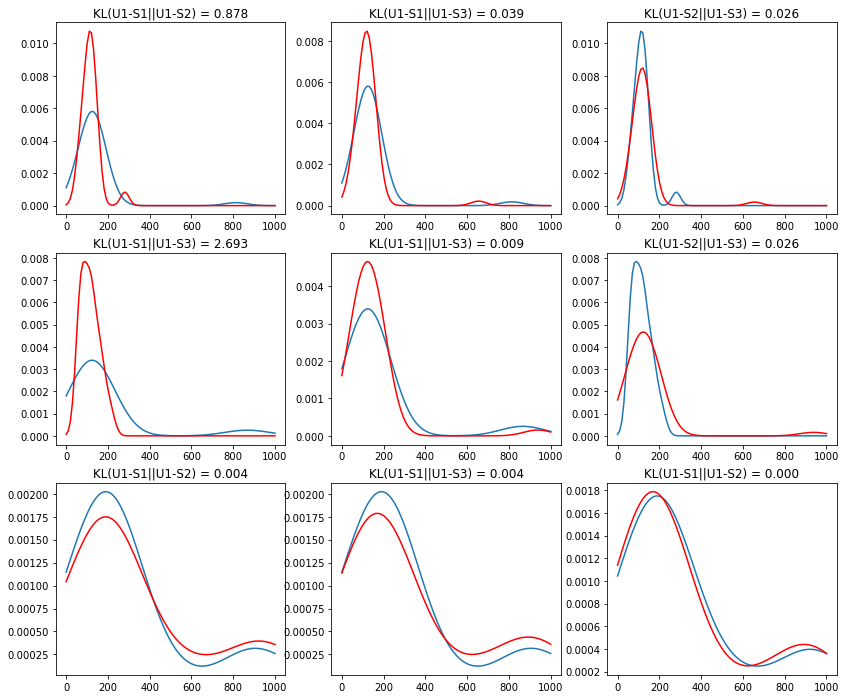

In [55]:
x = np.linspace(0,1000,100)
fig, axs = plt.subplots(3, 3, figsize = (14, 12))
axs[0,0].plot(x, y_fixed_111)
axs[0,0].plot(x, y_fixed_121, c='red')
axs[0,0].set_title('KL(U1-S1||U1-S2) = %1.3f' % kl_divergence(y_fixed_111, y_fixed_121))
axs[0,1].plot(x, y_fixed_111)
axs[0,1].plot(x, y_fixed_131, c='red')
axs[0,1].set_title('KL(U1-S1||U1-S3) = %1.3f' % kl_divergence(y_fixed_111, y_fixed_131))
axs[0,2].plot(x, y_fixed_121)
axs[0,2].plot(x, y_fixed_131, c='red')
axs[0,2].set_title('KL(U1-S2||U1-S3) = %1.3f' % kl_divergence(y_fixed_121, y_fixed_131))
axs[1,0].plot(x, y_fixed_112)
axs[1,0].plot(x, y_fixed_122, c='red')
axs[1,0].set_title('KL(U1-S1||U1-S3) = %1.3f' % kl_divergence(y_fixed_112, y_fixed_122))
axs[1,1].plot(x, y_fixed_112)
axs[1,1].plot(x, y_fixed_132, c='red')
axs[1,1].set_title('KL(U1-S1||U1-S3) = %1.3f' % kl_divergence(y_fixed_112, y_fixed_132))
axs[1,2].plot(x, y_fixed_122)
axs[1,2].plot(x, y_fixed_132, c='red')
axs[1,2].set_title('KL(U1-S2||U1-S3) = %1.3f' % kl_divergence(y_fixed_122, y_fixed_132))
axs[2,0].plot(x, y_fixed_113)
axs[2,0].plot(x, y_fixed_123, c='red')
axs[2,0].set_title('KL(U1-S1||U1-S2) = %1.3f' % kl_divergence(y_fixed_113, y_fixed_123))
axs[2,1].plot(x, y_fixed_113)
axs[2,1].plot(x, y_fixed_133, c='red')
axs[2,1].set_title('KL(U1-S1||U1-S3) = %1.3f' % kl_divergence(y_fixed_113, y_fixed_133))
axs[2,2].plot(x, y_fixed_123)
axs[2,2].plot(x, y_fixed_133, c='red')
axs[2,2].set_title('KL(U1-S1||U1-S2) = %1.3f' % kl_divergence(y_fixed_123, y_fixed_133))
plt.show()

### User 1 free text

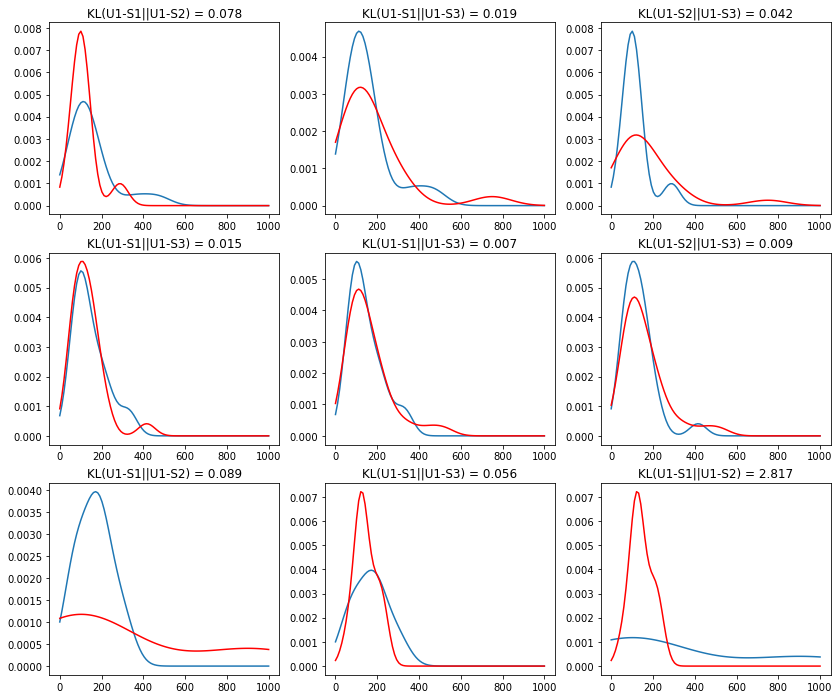

In [56]:
x = np.linspace(0,1000,100)
fig, axs = plt.subplots(3, 3, figsize = (14, 12))
axs[0,0].plot(x, y_free_111)
axs[0,0].plot(x, y_free_121, c='red')
axs[0,0].set_title('KL(U1-S1||U1-S2) = %1.3f' % kl_divergence(y_free_111, y_free_121))
axs[0,1].plot(x, y_free_111)
axs[0,1].plot(x, y_free_131, c='red')
axs[0,1].set_title('KL(U1-S1||U1-S3) = %1.3f' % kl_divergence(y_free_111, y_free_131))
axs[0,2].plot(x, y_free_121)
axs[0,2].plot(x, y_free_131, c='red')
axs[0,2].set_title('KL(U1-S2||U1-S3) = %1.3f' % kl_divergence(y_free_121, y_free_131))
axs[1,0].plot(x, y_free_112)
axs[1,0].plot(x, y_free_122, c='red')
axs[1,0].set_title('KL(U1-S1||U1-S3) = %1.3f' % kl_divergence(y_free_112, y_free_122))
axs[1,1].plot(x, y_free_112)
axs[1,1].plot(x, y_free_132, c='red')
axs[1,1].set_title('KL(U1-S1||U1-S3) = %1.3f' % kl_divergence(y_free_112, y_free_132))
axs[1,2].plot(x, y_free_122)
axs[1,2].plot(x, y_free_132, c='red')
axs[1,2].set_title('KL(U1-S2||U1-S3) = %1.3f' % kl_divergence(y_free_122, y_free_132))
axs[2,0].plot(x, y_free_113)
axs[2,0].plot(x, y_free_123, c='red')
axs[2,0].set_title('KL(U1-S1||U1-S2) = %1.3f' % kl_divergence(y_free_113, y_free_123))
axs[2,1].plot(x, y_free_113)
axs[2,1].plot(x, y_free_133, c='red')
axs[2,1].set_title('KL(U1-S1||U1-S3) = %1.3f' % kl_divergence(y_free_113, y_free_133))
axs[2,2].plot(x, y_free_123)
axs[2,2].plot(x, y_free_133, c='red')
axs[2,2].set_title('KL(U1-S1||U1-S2) = %1.3f' % kl_divergence(y_free_123, y_free_133))
plt.show()

### Inter Class

In [ ]:
headers = ["Text_type", "Distance", "User_combination", "Sample_combination", "KL_divergence", "EM_distance"]

data = [["Fixed_Text","Distance_1", "User_1/User_2", "Sample_1/ Sample_1",kl_divergence(y_fixed_111, y_fixed_211),
         wasserstein_distance(y_fixed_111, y_fixed_211)],
        ["", " ", " ", "Sample_2/ Sample_2",kl_divergence(y_fixed_121, y_fixed_221),
        wasserstein_distance(y_fixed_121, y_fixed_221)], 
        ["", " ", " ", "Sample_3/ Sample_3",kl_divergence(y_fixed_131, y_fixed_231),
        wasserstein_distance(y_fixed_131, y_fixed_231)],
        ["","","","","",""],
       ["Free_Text","Distance_1", "User_1/User_2", "Sample_1/ Sample_1",kl_divergence(y_free_111, y_free_211),
         wasserstein_distance(y_free_111, y_free_211)],
        ["", " ", " ", "Sample_2/ Sample_2",kl_divergence(y_free_121, y_free_221),
        wasserstein_distance(y_free_121, y_free_221)], 
        ["", " ", " ", "Sample_3/ Sample_3",kl_divergence(y_free_131, y_free_231),
        wasserstein_distance(y_free_131, y_free_231)],
        ["","","","","",""],
       ["Fixed_Text","Distance_2", "User_1/User_2", "Sample_1/ Sample_1",kl_divergence(y_fixed_112, y_fixed_212),
         wasserstein_distance(y_fixed_112, y_fixed_212)],
        ["", " ", " ", "Sample_2/ Sample_2",kl_divergence(y_fixed_122, y_fixed_222),
        wasserstein_distance(y_fixed_122, y_fixed_222)], 
        ["", " ", " ", "Sample_3/ Sample_3",kl_divergence(y_fixed_132, y_fixed_232),
        wasserstein_distance(y_fixed_132, y_fixed_232)],
       ["","","","","",""],
        ["Free_Text","Distance_2", "User_1/User_2", "Sample_1/ Sample_1",kl_divergence(y_free_112, y_free_212),
         wasserstein_distance(y_free_112, y_free_212)],
        ["", " ", " ", "Sample_2/ Sample_2",kl_divergence(y_free_122, y_free_222),
        wasserstein_distance(y_free_122, y_free_222)], 
        ["", " ", " ", "Sample_3/ Sample_3",kl_divergence(y_free_132, y_free_232),
        wasserstein_distance(y_free_132, y_free_232)],
           ["","","","","",""],
       ["Fixed_Text","Distance_3", "User_1/User_2", "Sample_1/ Sample_1",kl_divergence(y_fixed_113, y_fixed_213),
         wasserstein_distance(y_fixed_113, y_fixed_213)],
        ["", " ", " ", "Sample_2/ Sample_2",kl_divergence(y_fixed_123, y_fixed_223),
        wasserstein_distance(y_fixed_123, y_fixed_223)], 
        ["", " ", " ", "Sample_3/ Sample_3",kl_divergence(y_fixed_133, y_fixed_233),
        wasserstein_distance(y_fixed_133, y_fixed_233)],
          ["","","","","",""],
       ["Free_Text","Distance_3", "User_1/User_2", "Sample_1/ Sample_1",kl_divergence(y_free_113, y_free_213),
         wasserstein_distance(y_free_113, y_free_213)],
        ["", " ", " ", "Sample_2/ Sample_2",kl_divergence(y_free_123, y_free_223),
        wasserstein_distance(y_free_123, y_free_223)], 
        ["", " ", " ", "Sample_3/ Sample_3",kl_divergence(y_free_133, y_free_233),
        wasserstein_distance(y_free_133, y_free_233)]]

print(tabulate(data, headers=headers))

Text(0.5, 1.0, 'KL(U1-S3||U21-S3) = 0.013')

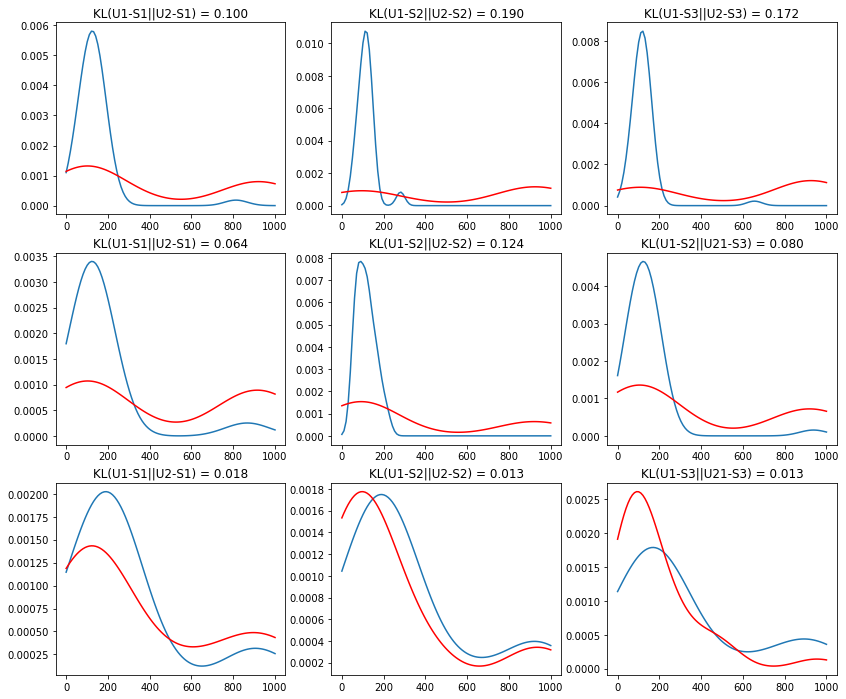

In [57]:
x = np.linspace(0,1000,100)
fig, axs = plt.subplots(3, 3, figsize = (14, 12))
axs[0,0].plot(x, y_fixed_111)
axs[0,0].plot(x, y_fixed_211, c='red')
axs[0,0].set_title('KL(U1-S1||U2-S1) = %1.3f' % kl_divergence(y_fixed_111, y_fixed_211))
axs[1,0].plot(x, y_fixed_112)
axs[1,0].plot(x, y_fixed_212, c='red')
axs[1,0].set_title('KL(U1-S1||U2-S1) = %1.3f' % kl_divergence(y_fixed_112, y_fixed_212))
axs[2,0].plot(x, y_fixed_113)
axs[2,0].plot(x, y_fixed_213, c='red')
axs[2,0].set_title('KL(U1-S1||U2-S1) = %1.3f' % kl_divergence(y_fixed_113, y_fixed_213))
axs[0,1].plot(x, y_fixed_121)
axs[0,1].plot(x, y_fixed_221, c='red')
axs[0,1].set_title('KL(U1-S2||U2-S2) = %1.3f' % kl_divergence(y_fixed_121, y_fixed_221))
axs[1,1].plot(x, y_fixed_122)
axs[1,1].plot(x, y_fixed_222, c='red')
axs[1,1].set_title('KL(U1-S2||U2-S2) = %1.3f' % kl_divergence(y_fixed_122, y_fixed_222))
axs[2,1].plot(x, y_fixed_123)
axs[2,1].plot(x, y_fixed_223, c='red')
axs[2,1].set_title('KL(U1-S2||U2-S2) = %1.3f' % kl_divergence(y_fixed_123, y_fixed_223))
axs[0,2].plot(x, y_fixed_131)
axs[0,2].plot(x, y_fixed_231, c='red')
axs[0,2].set_title('KL(U1-S3||U2-S3) = %1.3f' % kl_divergence(y_fixed_131, y_fixed_231))
axs[1,2].plot(x, y_fixed_132)
axs[1,2].plot(x, y_fixed_232, c='red')
axs[1,2].set_title('KL(U1-S2||U21-S3) = %1.3f' % kl_divergence(y_fixed_132, y_fixed_232))
axs[2,2].plot(x, y_fixed_133)
axs[2,2].plot(x, y_fixed_233, c='red')
axs[2,2].set_title('KL(U1-S3||U21-S3) = %1.3f' % kl_divergence(y_fixed_133, y_fixed_233))

Text(0.5, 1.0, 'KL(U1-S3||U21-S3) = 0.080')

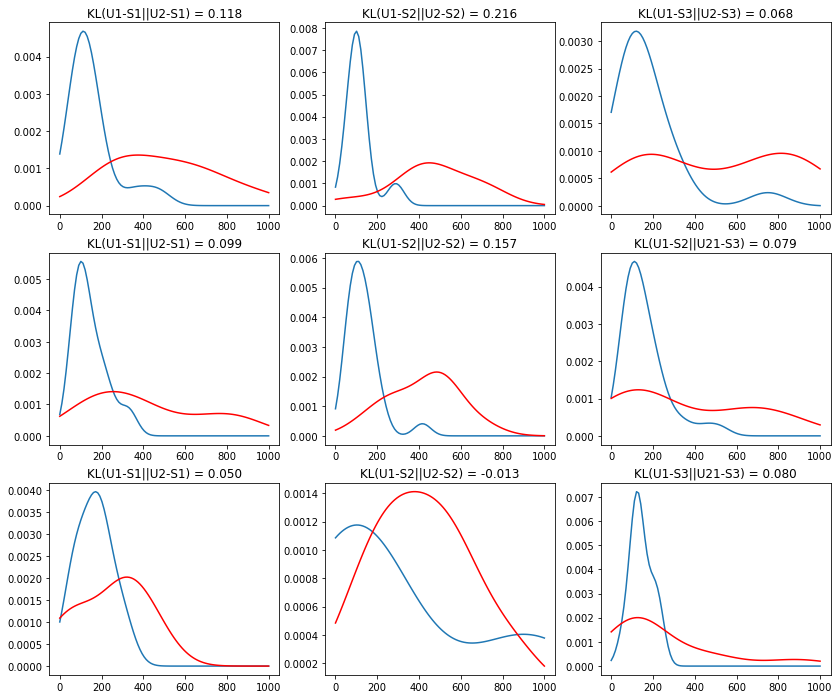

In [61]:
x = np.linspace(0,1000,100)
fig, axs = plt.subplots(3, 3, figsize = (14, 12))
axs[0,0].plot(x, y_free_111)
axs[0,0].plot(x, y_free_211, c='red')
axs[0,0].set_title('KL(U1-S1||U2-S1) = %1.3f' % kl_divergence(y_free_111, y_free_211))
axs[1,0].plot(x, y_free_112)
axs[1,0].plot(x, y_free_212, c='red')
axs[1,0].set_title('KL(U1-S1||U2-S1) = %1.3f' % kl_divergence(y_free_112, y_free_212))
axs[2,0].plot(x, y_free_113)
axs[2,0].plot(x, y_free_213, c='red')
axs[2,0].set_title('KL(U1-S1||U2-S1) = %1.3f' % kl_divergence(y_free_113, y_free_213))
axs[0,1].plot(x, y_free_121)
axs[0,1].plot(x, y_free_221, c='red')
axs[0,1].set_title('KL(U1-S2||U2-S2) = %1.3f' % kl_divergence(y_free_121, y_free_221))
axs[1,1].plot(x, y_free_122)
axs[1,1].plot(x, y_free_222, c='red')
axs[1,1].set_title('KL(U1-S2||U2-S2) = %1.3f' % kl_divergence(y_free_122, y_free_222))
axs[2,1].plot(x, y_free_123)
axs[2,1].plot(x, y_free_223, c='red')
axs[2,1].set_title('KL(U1-S2||U2-S2) = %1.3f' % kl_divergence(y_free_123, y_free_223))
axs[0,2].plot(x, y_free_131)
axs[0,2].plot(x, y_free_231, c='red')
axs[0,2].set_title('KL(U1-S3||U2-S3) = %1.3f' % kl_divergence(y_free_131, y_free_231))
axs[1,2].plot(x, y_free_132)
axs[1,2].plot(x, y_free_232, c='red')
axs[1,2].set_title('KL(U1-S2||U21-S3) = %1.3f' % kl_divergence(y_free_132, y_free_232))
axs[2,2].plot(x, y_free_133)
axs[2,2].plot(x, y_free_233, c='red')
axs[2,2].set_title('KL(U1-S3||U21-S3) = %1.3f' % kl_divergence(y_free_133, y_free_233))

### User 1 and User 2 fixed text

In [62]:
col_head = ["Distance", "Type", "KL"]
data__fixed_f1 = [["Distance_1", "Inter",kl_divergence(y_fixed_111, y_fixed_211)],
        ["Distance_1", "Inter",kl_divergence(y_fixed_121, y_fixed_221)], 
        ["Distance_1", "Inter",kl_divergence(y_fixed_131, y_fixed_231)],
        ["Distance_2", "Inter",kl_divergence(y_fixed_112, y_fixed_212)],
        ["Distance_2", "Inter",kl_divergence(y_fixed_122, y_fixed_222)], 
        ["Distance_2", "Inter",kl_divergence(y_fixed_132, y_fixed_232)],
        ["Distance_3", "Inter",kl_divergence(y_fixed_113, y_fixed_213)],
        ["Distance_3", "Inter",kl_divergence(y_fixed_123, y_fixed_223)], 
        ["Distance_3", "Inter",kl_divergence(y_fixed_133, y_fixed_233)],
        ["Distance_1", "Intra",kl_divergence(y_fixed_111, y_fixed_121)],
        ["Distance_1", "Intra",kl_divergence(y_fixed_111, y_fixed_131)], 
        ["Distance_1", "Intra",kl_divergence(y_fixed_121, y_fixed_131)],
        ["Distance_1", "Intra",kl_divergence(y_fixed_211, y_fixed_221)], 
        ["Distance_1", "Intra",kl_divergence(y_fixed_211, y_fixed_231)], 
        ["Distance_1", "Intra",kl_divergence(y_fixed_221, y_fixed_231)],
        ["Distance_2", "Intra",kl_divergence(y_fixed_112, y_fixed_122)],
        ["Distance_2", "Intra",kl_divergence(y_fixed_112, y_fixed_132)], 
        ["Distance_2", "Intra",kl_divergence(y_fixed_122, y_fixed_132)],
        ["Distance_2", "Intra",kl_divergence(y_fixed_212, y_fixed_222)], 
        ["Distance_2", "Intra",kl_divergence(y_fixed_212, y_fixed_232)], 
        ["Distance_2", "Intra",kl_divergence(y_fixed_222, y_fixed_232)],
        ["Distance_3", "Intra",kl_divergence(y_fixed_113, y_fixed_123)],
        ["Distance_3", "Intra",kl_divergence(y_fixed_113, y_fixed_133)], 
        ["Distance_3", "Intra",kl_divergence(y_fixed_123, y_fixed_133)],
        ["Distance_3", "Intra",kl_divergence(y_fixed_213, y_fixed_223)], 
        ["Distance_3", "Intra",kl_divergence(y_fixed_213, y_fixed_233)], 
        ["Distance_3", "Intra",kl_divergence(y_fixed_223, y_fixed_233)]]
fixed_KL_f1 = pd.DataFrame(data__fixed_f1, columns=col_head)

In [63]:
col_head = ["Distance", "Type", "KL"]
data__fixed_f2 = [["Distance_1", "Inter",kl_divergence(y_fixed_111_f2, y_fixed_211_f2)],
        ["Distance_1", "Inter",kl_divergence(y_fixed_121_f2, y_fixed_221_f2)], 
        ["Distance_1", "Inter",kl_divergence(y_fixed_131_f2, y_fixed_231_f2)],
        ["Distance_2", "Inter",kl_divergence(y_fixed_112_f2, y_fixed_212_f2)],
        ["Distance_2", "Inter",kl_divergence(y_fixed_122_f2, y_fixed_222_f2)], 
        ["Distance_2", "Inter",kl_divergence(y_fixed_132_f2, y_fixed_232_f2)],
        ["Distance_3", "Inter",kl_divergence(y_fixed_113_f2, y_fixed_213_f2)],
        ["Distance_3", "Inter",kl_divergence(y_fixed_123_f2, y_fixed_223_f2)], 
        ["Distance_3", "Inter",kl_divergence(y_fixed_133_f2, y_fixed_233_f2)],
        ["Distance_1", "Intra",kl_divergence(y_fixed_111_f2, y_fixed_121_f2)],
        ["Distance_1", "Intra",kl_divergence(y_fixed_111_f2, y_fixed_131_f2)], 
        ["Distance_1", "Intra",kl_divergence(y_fixed_121_f2, y_fixed_131_f2)],
        ["Distance_1", "Intra",kl_divergence(y_fixed_211_f2, y_fixed_221_f2)], 
        ["Distance_1", "Intra",kl_divergence(y_fixed_211_f2, y_fixed_231_f2)], 
        ["Distance_1", "Intra",kl_divergence(y_fixed_221_f2, y_fixed_231_f2)],
        ["Distance_2", "Intra",kl_divergence(y_fixed_112_f2, y_fixed_122_f2)],
        ["Distance_2", "Intra",kl_divergence(y_fixed_112_f2, y_fixed_132_f2)], 
        ["Distance_2", "Intra",kl_divergence(y_fixed_122_f2, y_fixed_132_f2)],
        ["Distance_2", "Intra",kl_divergence(y_fixed_212_f2, y_fixed_222_f2)], 
        ["Distance_2", "Intra",kl_divergence(y_fixed_212_f2, y_fixed_232_f2)], 
        ["Distance_2", "Intra",kl_divergence(y_fixed_222_f2, y_fixed_232_f2)],
        ["Distance_3", "Intra",kl_divergence(y_fixed_113_f2, y_fixed_123_f2)],
        ["Distance_3", "Intra",kl_divergence(y_fixed_113_f2, y_fixed_133_f2)], 
        ["Distance_3", "Intra",kl_divergence(y_fixed_123_f2, y_fixed_133_f2)],
        ["Distance_3", "Intra",kl_divergence(y_fixed_213_f2, y_fixed_223_f2)], 
        ["Distance_3", "Intra",kl_divergence(y_fixed_213_f2, y_fixed_233_f2)], 
        ["Distance_3", "Intra",kl_divergence(y_fixed_223_f2, y_fixed_233_f2)]]
fixed_KL_f2 = pd.DataFrame(data__fixed_f2, columns=col_head)

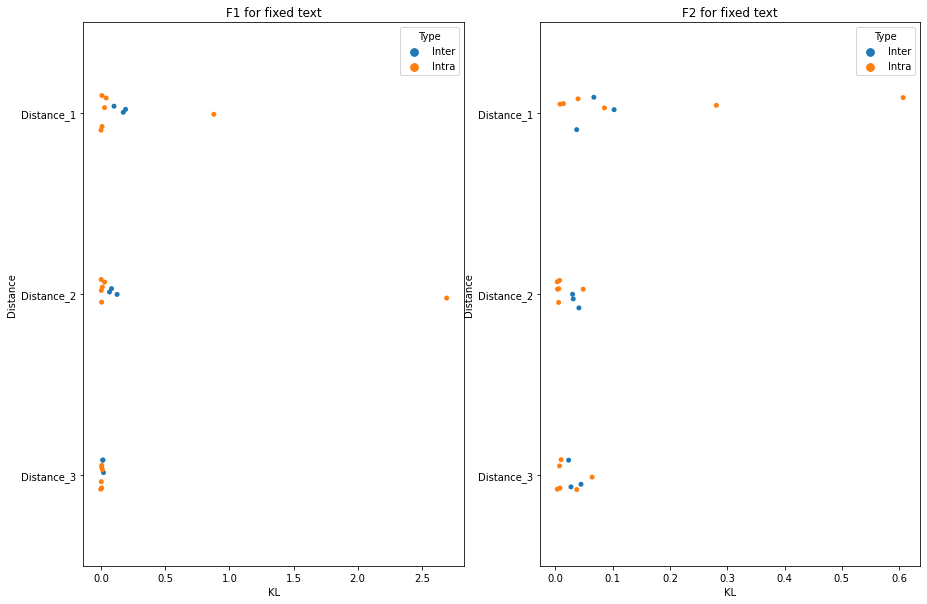

In [64]:
fig1, (ax1, ax2) = plt.subplots(ncols = 2, nrows =1, figsize = (15,10))
sns.stripplot(data= fixed_KL_f1, x='KL',y='Distance', hue='Type', ax=ax1)
sns.stripplot(data= fixed_KL_f2, x='KL',y='Distance', hue='Type', ax=ax2)
ax1.set_title("F1 for fixed text")
ax2.set_title('F2 for fixed text')
plt.show()

In [ ]:
col_head = ["Distance", "Type", "KL"]
data__free_f1 = [["Distance_1", "Inter",kl_divergence(y_free_111, y_free_211)],
        ["Distance_1", "Inter",kl_divergence(y_free_121, y_free_221)], 
        ["Distance_1", "Inter",kl_divergence(y_free_131, y_free_231)],
        ["Distance_2", "Inter",kl_divergence(y_free_112, y_free_212)],
        ["Distance_2", "Inter",kl_divergence(y_free_122, y_free_222)], 
        ["Distance_2", "Inter",kl_divergence(y_free_132, y_free_232)],
        ["Distance_3", "Inter",kl_divergence(y_free_113, y_free_213)],
        ["Distance_3", "Inter",kl_divergence(y_free_123, y_free_223)], 
        ["Distance_3", "Inter",kl_divergence(y_free_133, y_free_233)],
        ["Distance_1", "Intra",kl_divergence(y_free_111, y_free_121)],
        ["Distance_1", "Intra",kl_divergence(y_free_111, y_free_131)], 
        ["Distance_1", "Intra",kl_divergence(y_free_121, y_free_131)],
        ["Distance_1", "Intra",kl_divergence(y_free_211, y_free_221)], 
        ["Distance_1", "Intra",kl_divergence(y_free_211, y_free_231)], 
        ["Distance_1", "Intra",kl_divergence(y_free_221, y_free_231)],
        ["Distance_2", "Intra",kl_divergence(y_free_112, y_free_122)],
        ["Distance_2", "Intra",kl_divergence(y_free_112, y_free_132)], 
        ["Distance_2", "Intra",kl_divergence(y_free_122, y_free_132)],
        ["Distance_2", "Intra",kl_divergence(y_free_212, y_free_222)], 
        ["Distance_2", "Intra",kl_divergence(y_free_212, y_free_232)], 
        ["Distance_2", "Intra",kl_divergence(y_free_222, y_free_232)],
        ["Distance_3", "Intra",kl_divergence(y_free_113, y_free_123)],
        ["Distance_3", "Intra",kl_divergence(y_free_113, y_free_133)], 
        ["Distance_3", "Intra",kl_divergence(y_free_123, y_free_133)],
        ["Distance_3", "Intra",kl_divergence(y_free_213, y_free_223)], 
        ["Distance_3", "Intra",kl_divergence(y_free_213, y_free_233)], 
        ["Distance_3", "Intra",kl_divergence(y_free_223, y_free_233)]]
free_KL_f1 = pd.DataFrame(data__free_f1, columns=col_head)

In [ ]:
col_head = ["Distance", "Type", "KL"]
data__free_f2 = [["Distance_1", "Inter",kl_divergence(y_free_111_f2, y_free_211_f2)],
        ["Distance_1", "Inter",kl_divergence(y_free_121_f2, y_free_221_f2)], 
        ["Distance_1", "Inter",kl_divergence(y_free_131_f2, y_free_231_f2)],
        ["Distance_2", "Inter",kl_divergence(y_free_112_f2, y_free_212_f2)],
        ["Distance_2", "Inter",kl_divergence(y_free_122_f2, y_free_222_f2)], 
        ["Distance_2", "Inter",kl_divergence(y_free_132_f2, y_free_232_f2)],
        ["Distance_3", "Inter",kl_divergence(y_free_113_f2, y_free_213_f2)],
        ["Distance_3", "Inter",kl_divergence(y_free_123_f2, y_free_223_f2)], 
        ["Distance_3", "Inter",kl_divergence(y_free_133_f2, y_free_233_f2)],
        ["Distance_1", "Intra",kl_divergence(y_free_111_f2, y_free_121_f2)],
        ["Distance_1", "Intra",kl_divergence(y_free_111_f2, y_free_131_f2)], 
        ["Distance_1", "Intra",kl_divergence(y_free_121_f2, y_free_131_f2)],
        ["Distance_1", "Intra",kl_divergence(y_free_211_f2, y_free_221_f2)], 
        ["Distance_1", "Intra",kl_divergence(y_free_211_f2, y_free_231_f2)], 
        ["Distance_1", "Intra",kl_divergence(y_free_221_f2, y_free_231_f2)],
        ["Distance_2", "Intra",kl_divergence(y_free_112_f2, y_free_122_f2)],
        ["Distance_2", "Intra",kl_divergence(y_free_112_f2, y_free_132_f2)], 
        ["Distance_2", "Intra",kl_divergence(y_free_122_f2, y_free_132_f2)],
        ["Distance_2", "Intra",kl_divergence(y_free_212_f2, y_free_222_f2)], 
        ["Distance_2", "Intra",kl_divergence(y_free_212_f2, y_free_232_f2)], 
        ["Distance_2", "Intra",kl_divergence(y_free_222_f2, y_free_232_f2)],
        ["Distance_3", "Intra",kl_divergence(y_free_113_f2, y_free_123_f2)],
        ["Distance_3", "Intra",kl_divergence(y_free_113_f2, y_free_133_f2)], 
        ["Distance_3", "Intra",kl_divergence(y_free_123_f2, y_free_133_f2)],
        ["Distance_3", "Intra",kl_divergence(y_free_213_f2, y_free_223_f2)], 
        ["Distance_3", "Intra",kl_divergence(y_free_213_f2, y_free_233_f2)], 
        ["Distance_3", "Intra",kl_divergence(y_free_223_f2, y_free_233_f2)]]
free_KL_f2 = pd.DataFrame(data__free_f2, columns=col_head)

In [ ]:
fig1, (ax1, ax2) = plt.subplots(ncols = 2, nrows =1, figsize = (15,10))
sns.stripplot(data= free_KL_f1, x='KL',y='Distance', hue='Type', ax=ax1)
sns.stripplot(data= free_KL_f2, x='KL',y='Distance', hue='Type', ax=ax2)
ax1.set_title("F1 for free text")
ax2.set_title('F2 for free text')
plt.show()